<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logo.jpg" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Abuzer Yakaryilmaz | April 28, 2019 (updated)<br>
        Özlem Salehi | July 14, 2019 (updated)
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions for </font>Rotations</h2>

<a id="task2"></a>
<h3> Task 2 </h3>

Start with state $ \ket{0} $. 

Apply $ R(\pi/4) $ 7 times, and draw each state on the unit circle.

<h3>Solution</h3>

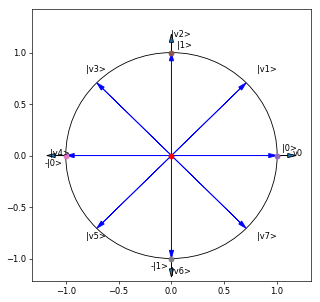

In [2]:
%run qlatvia.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

sqrttwo = 2**0.5
oversqrttwo = 1/sqrttwo

R = [ [oversqrttwo, -1*oversqrttwo], [oversqrttwo,oversqrttwo] ]

# function for rotation R
def rotate(px,py):
    newx = R[0][0]*px + R[0][1]*py
    newy = R[1][0]*px + R[1][1]*py
    return [newx,newy]

# apply rotation R 7 times
for i in range(1,8):
    [x,y] = rotate(x,y)
    draw_quantum_state(x,y,"|v"+str(i)+">")


<h3> Task 4 </h3>

Create three different quantum circuits where each circuit has a single qubit.

Randomly pick an angle $ \theta $.

Rotate the qubit of the first circuit with angle $ \theta $.

Rotate the qubits of the second and third circuits with angles $\theta_1$ and $ \theta_2 $, respectively, providing that both states are different but orthogonal to the state of the qubit of the first circuit.

Read the states of these three qubits from the local simulator, say $ \ket{v_0} $, $ \ket{v_1} $, and $ \ket{v_2} $, respectively. 

Verify the following by drawing or by finding their dot products:
<ol>
    <li>$ \ket{v_0} $ and $ \ket{v_1} $ are orthogonal (i.e., their dot product is zero.)</li>
    <li>$ \ket{v_0} $ and $ \ket{v_2} $ are orthogonal</li>
    <li>$ \ket{v_1} = -1\ket{v_2} $ (i.e., their dot product is -1).</li>
</ol>

<i><b>The orthogonal states can be  distinguishable perfectly (with probability 1).</b> 

More specifically, after applying certain quantum operations to both states, we can observe each with distinguishable outcomes (i.e., 0 and 1 or vice versa) with probability 1.</i>

Rotate all these three qubits with an angle $\theta'$ such that we observe only state $ \ket{0} $ in the first qubit and only state $ \ket{1} $ in the second and third qubits (or vice versa).

<i> Remark that, after picking $\theta$, you determine $\theta_1$, $ \theta_2 $, and $ \theta' $.</i>

Measure each qubit.

Execute your program 1000 times.

<h3>Solution</h3>

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi
from random import randrange

# first qubit 
qreg1 =  QuantumRegister(1) 
creg1 = ClassicalRegister(1) 
mycircuit1 = QuantumCircuit(qreg1,creg1)

# second qubit 
qreg2 =  QuantumRegister(1) 
creg2 = ClassicalRegister(1) 
mycircuit2 = QuantumCircuit(qreg2,creg2)

# third qubit 
qreg3 =  QuantumRegister(1) 
creg3 = ClassicalRegister(1) 
mycircuit3 = QuantumCircuit(qreg3,creg3)

# randomly pick the angle of rotation
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")


# rotate the first qubit
mycircuit1.ry(2*theta,qreg1[0])

# the different angles orthogonal to theta
theta1 = theta + pi/2
theta2 = theta - pi/2

# rotate the second and third qubits
mycircuit2.ry(2*theta1,qreg2[0])
mycircuit3.ry(2*theta2,qreg3[0])

In [ ]:
# read the quantum state of the first qubit
job = execute(mycircuit1,Aer.get_backend('statevector_simulator'))
current_quantum_state=job.result().get_statevector(mycircuit1) 
[x1,y1]=[current_quantum_state[0].real,current_quantum_state[1].real]
print("the first qubit:",x1,y1)

# read the quantum state of the second qubit
job = execute(mycircuit2,Aer.get_backend('statevector_simulator'))
current_quantum_state=job.result().get_statevector(mycircuit2) 
[x2,y2]=[current_quantum_state[0].real,current_quantum_state[1].real]
print("the second qubit:",x2,y2)

# read the quantum state of the third qubit
job = execute(mycircuit3,Aer.get_backend('statevector_simulator'))
current_quantum_state=job.result().get_statevector(mycircuit3) 
[x3,y3]=[current_quantum_state[0].real,current_quantum_state[1].real]
print("the third qubit:",x3,y3)

In [ ]:
%run qlatvia.py

draw_qubit()

draw_quantum_state(x1,y1,"v0")
draw_quantum_state(x2,y2,"v1")
draw_quantum_state(x3,y3,"v2")

In [ ]:
print("the dot product of |v0> and |v1> is",x1*x2+y1*y2)
print("the dot product of |v0> and |v2> is",x1*x3+y1*y3)
print("the dot product of |v1> and |v2> is",x2*x3+y2*y3)

In [ ]:
# make a full rotation by theta + theta_prime
theta_prime = 2*pi - theta

# rotate all qubits with theta_prime
mycircuit1.ry(2*theta_prime,qreg1[0])
mycircuit2.ry(2*theta_prime,qreg2[0])
mycircuit3.ry(2*theta_prime,qreg3[0])

# measure all qubits
mycircuit1.measure(qreg1,creg1)
mycircuit2.measure(qreg2,creg2)
mycircuit3.measure(qreg3,creg3)

In [ ]:
# draw the first circuit
mycircuit1.draw()

In [ ]:
# draw the second circuit
mycircuit2.draw()

In [ ]:
# draw the third circuit
mycircuit3.draw()

In [ ]:
# execute the first circuit
job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit1)
print(counts)

# execute the second circuit
job = execute(mycircuit2,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit2)
print(counts)

# execute the third circuit
job = execute(mycircuit3,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit3)
print(counts)

<a id="task5"></a>
<h3> Task 5 </h3>

Create a quantum circuit with one qubit and one bit.

Rotate the qubit with angle $ \pi/4 $ eight times.

After each rotation, print the unitary operator representing the whole rotations until this point.

Verify your results by printing the rotation matrix in python. 

<h3>Solution</h3>

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin

# first qubit 
qreg =  QuantumRegister(1) 
creg = ClassicalRegister(1) 
mycircuit = QuantumCircuit(qreg,creg)

theta=pi/4

for i in range(1,9):
    total_theta = i*theta
    mycircuit.ry(2*theta,qreg[0])
    job = execute(mycircuit, Aer.get_backend('unitary_simulator'))
    current_unitary = job.result().get_unitary(mycircuit, decimals=3)
    print("after",i,"iteration(s):")
    print(current_unitary[0][0].real,current_unitary[0][1].real)
    print(current_unitary[1][0].real,current_unitary[1][1].real)
    print("calculated by python:")
    print(round(cos(total_theta),3),round(-sin(total_theta),3))
    print(round(sin(total_theta),3),round(cos(total_theta),3))
    print()

<a id="task6"></a>
<h3>Task 6</h3>

In this task, you are going to prove that two consecutive reflections is a rotation.

Multiply the matrices for the two operators $\mathrm{Ref}(\theta_{1})$ and $\mathrm{Ref}(\theta_{2})$ and prove that the effect of two consecutive reflections (first over $\theta_1$ and then over $\theta_2$) is a rotation with angle $2(\theta_2 - \theta_{1})$.

Hint: The follofing formula will be helpful.

$ 
\begin{align*}
\sin(a+b)&=\sin(a)\cos(b)+\cos(a)\sin(b)\\
\sin(a-b)&=\sin(a)\cos(b)-\cos(a)\sin(b)\\
\cos(a+b)&=\cos(a)\cos(b)-\sin(a)\sin(b)\\
\cos(a-b)&=\cos(a)\cos(b)+\sin(a)\sin(b)
\end{align*}
$

<h3>Solution:</h3>

$$ \mathrm{Ref}(\theta_{2}) \mathrm{Ref}(\theta_{1}) = \mymatrix{cc}{\cos(2\theta_{2}) & \sin(2\theta_{2}) \\ \sin(2\theta_{2})& -\cos(2\theta_{2})  }
\mymatrix{cc}{\cos(2\theta_{1}) & \sin(2\theta_{1}) \\ \sin(2\theta_{1})& -\cos(2\theta_{1})  }$$

$$=
\mymatrix{cc}{\cos(2\theta_{2})\cos(2\theta_{1}) + \sin(2\theta_{2})\sin(2\theta_{1})& \cos(2\theta_{2})\sin(2\theta_{1})-  \sin(2\theta_{2})\cos(2\theta_{1}) \\ \sin(2\theta_{2})\cos(2\theta_{1}) -\cos(2\theta_{2})\sin(2\theta_{1}) & \sin(2\theta_{2})\sin(2\theta_{1})+\cos(2\theta_{2})\cos(2\theta_{1}) }
$$

$$=
\mymatrix{cc}{\cos(2\theta_{2}-2\theta_{1}) & -\sin(2\theta_{2}-2\theta_1) \\ \sin(2\theta_{2}-2\theta_1)& \cos(2\theta_{2}-2\theta_1)  }
$$

This matrix is exactly equal to ${R}(2(\theta_2 - \theta_1))$, the matrix of rotation with angle $2(\theta_2-\theta_1)$.